# Random Forest Classification

In [1]:
import random
import numpy as np
import pandas as pd
import seaborn as sn
from numpy import std
from numpy import mean
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score
%matplotlib inline

In [2]:
%cd Z:\PPMI_Data\Excels\NonMotors\The251\Male
df = pd.read_csv('Feats45_CategAge_APPRDX_Male_Edit.csv')
print(df.shape)
df.head(2)

Z:\PPMI_Data\Excels\NonMotors\The251\Male
(167, 47)


,PATNO,APPRDX,Benton,Clock,COGSTATE,Epworth,Geriatric_Depression,Hopkins_Recall,Hopkins_Recog,LetterNumber,...,SCOPA_Sex,Semantic,Education,Hand,STAIS,STAIA,Symbol_Digit,Trail_Making_A,Trail_Making_B,UPSIT
0,3010,1,0,1,0,0,1,0,0,1,...,0,2,1,0,0,0,1,0,0,2
1,3024,1,0,0,0,1,0,0,0,1,...,0,2,1,0,0,0,1,1,1,0


In [3]:
df1 = df.drop(['PATNO'], axis=1)
df1['APPRDX'] = df1['APPRDX'] -1
print(df1.shape)
df1.head(2)

(167, 46)


,APPRDX,Benton,Clock,COGSTATE,Epworth,Geriatric_Depression,Hopkins_Recall,Hopkins_Recog,LetterNumber,Lexical_Fluency,...,SCOPA_Sex,Semantic,Education,Hand,STAIS,STAIA,Symbol_Digit,Trail_Making_A,Trail_Making_B,UPSIT
0,0,0,1,0,0,1,0,0,1,1,...,0,2,1,0,0,0,1,0,0,2
1,0,0,0,0,1,0,0,0,1,2,...,0,2,1,0,0,0,1,1,1,0


# Running Model with different Features

## RanFor 100 times, all 45 Feats 

In [4]:
np.random.seed (1)
dframe1 = pd.DataFrame(columns=['Accuracy', 'Std_Dev'])

for i in range(1, 101):
    print(i)
    df2 = df1.groupby('APPRDX').apply(lambda x: x.sample(50))
    X = df2.drop('APPRDX', axis = 1)
    y = df2['APPRDX']
    random_forest_model = RandomForestClassifier(n_estimators = 100, max_depth = 5, criterion = 'gini')
    scores = cross_val_score(random_forest_model, X, y, cv = 10, n_jobs = -1)
    mean_score = scores.mean()
    print(f'Mean accuracy: {mean_score}')
    new_row = {'Accuracy': mean_score, 'Std_Dev': std(scores)}
    dframe1 = pd.concat([dframe1, pd.DataFrame(new_row, index=[0])], ignore_index=True)


1
Mean accuracy: 0.86
2
Mean accuracy: 0.7899999999999999
3
Mean accuracy: 0.8300000000000001
4
Mean accuracy: 0.8400000000000001
5
Mean accuracy: 0.8
6
Mean accuracy: 0.8200000000000001
7
Mean accuracy: 0.86
8
Mean accuracy: 0.8099999999999999
9
Mean accuracy: 0.8200000000000001
10
Mean accuracy: 0.8100000000000002
11
Mean accuracy: 0.8399999999999999
12
Mean accuracy: 0.8400000000000001
13
Mean accuracy: 0.86
14
Mean accuracy: 0.8799999999999999
15
Mean accuracy: 0.8400000000000001
16
Mean accuracy: 0.82
17
Mean accuracy: 0.8699999999999999
18
Mean accuracy: 0.7799999999999999
19
Mean accuracy: 0.8200000000000001
20
Mean accuracy: 0.8600000000000001
21
Mean accuracy: 0.8400000000000001
22
Mean accuracy: 0.8100000000000002
23
Mean accuracy: 0.8200000000000001
24
Mean accuracy: 0.8300000000000001
25
Mean accuracy: 0.8400000000000001
26
Mean accuracy: 0.82
27
Mean accuracy: 0.76
28
Mean accuracy: 0.79
29
Mean accuracy: 0.8800000000000001
30
Mean accuracy: 0.8200000000000001
31
Mean accu

In [5]:
print(mean(dframe1['Accuracy']))
dframe1.to_csv ("NonMotor_45Feats_100RF10FCV_Male.csv", index=False)

0.8314999999999999


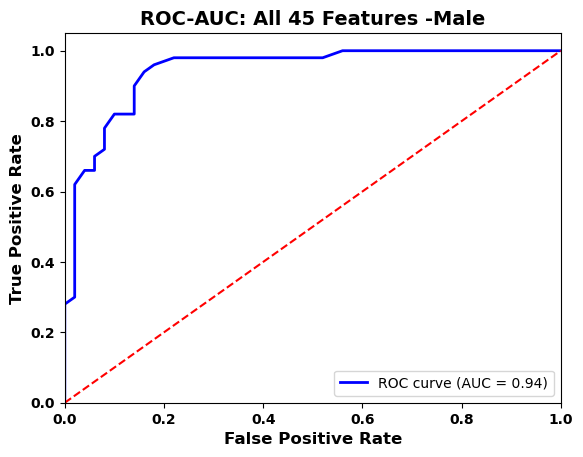

In [6]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt

dataset = df1.groupby('APPRDX').apply(lambda x: x.sample(50, random_state=1))
X = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values
classifier = RandomForestClassifier(n_estimators=100, criterion='gini')

# Generate predicted probabilities using cross-validation
y_prob = cross_val_predict(classifier, X, y, cv=10, method='predict_proba')

# Calculate the false positive rate and true positive rate for different thresholds
fpr, tpr, thresholds = roc_curve(y, y_prob[:, 1], pos_label=1)

# Calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='b', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='r', lw=1.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel('False Positive Rate', fontweight='bold',fontsize=12)
plt.ylabel('True Positive Rate', fontweight='bold',fontsize=12)
plt.title('ROC-AUC: All 45 Features -Male', fontweight='bold',fontsize=14)
plt.legend(loc="lower right")
# save the plot as SVG and PDF files
plt.savefig('ROC_AUC_All45FeaturesMale.svg')
plt.savefig('ROC_AUC_All45FeaturesMale.pdf')
plt.show()


## RanFor 100 times. Random Samples = 11

In [7]:
df2 = df1.drop (['APPRDX'], axis=1)

In [8]:
np.random.seed (1)
dframe1 = pd.DataFrame(columns=['Accuracy', 'Std_Dev'])
for i in range (1,101) :
        print(i)
        df3 = df2.sample(11, axis=1)
        df3 = df3.reindex(['APPRDX', *df3.columns], axis=1).assign(APPRDX=df1['APPRDX'])
        dataset = df3.groupby('APPRDX').apply(lambda x: x.sample(50))
        X = dataset.iloc[:, 1:].values
        y = dataset.iloc[:, 0].values
        random_forest_model = RandomForestClassifier(n_estimators = 100, max_depth = 5, criterion = 'gini')
        scores = cross_val_score(random_forest_model, X, y, cv = 10, n_jobs = -1)
        mean_score = scores.mean()
        print(f'Mean accuracy: {mean_score}')
        new_row = {'Accuracy': mean_score, 'Std_Dev': std(scores)}
        dframe1 = pd.concat([dframe1, pd.DataFrame(new_row, index=[0])], ignore_index=True)


1
Mean accuracy: 0.82
2
Mean accuracy: 0.67
3
Mean accuracy: 0.66
4
Mean accuracy: 0.8
5
Mean accuracy: 0.67
6
Mean accuracy: 0.7
7
Mean accuracy: 0.76
8
Mean accuracy: 0.6299999999999999
9
Mean accuracy: 0.77
10
Mean accuracy: 0.71
11
Mean accuracy: 0.73
12
Mean accuracy: 0.63
13
Mean accuracy: 0.8099999999999999
14
Mean accuracy: 0.75
15
Mean accuracy: 0.75
16
Mean accuracy: 0.6600000000000001
17
Mean accuracy: 0.7
18
Mean accuracy: 0.79
19
Mean accuracy: 0.5599999999999999
20
Mean accuracy: 0.57
21
Mean accuracy: 0.69
22
Mean accuracy: 0.61
23
Mean accuracy: 0.7699999999999999
24
Mean accuracy: 0.78
25
Mean accuracy: 0.72
26
Mean accuracy: 0.8299999999999998
27
Mean accuracy: 0.73
28
Mean accuracy: 0.6699999999999999
29
Mean accuracy: 0.6299999999999999
30
Mean accuracy: 0.55
31
Mean accuracy: 0.78
32
Mean accuracy: 0.6799999999999999
33
Mean accuracy: 0.7
34
Mean accuracy: 0.8699999999999999
35
Mean accuracy: 0.69
36
Mean accuracy: 0.64
37
Mean accuracy: 0.6900000000000001
38
Mean 

In [9]:
print(mean(dframe1['Accuracy']))
dframe1.to_csv ("Random11Feat_from45Feats_100RF10FCV_Male.csv")

0.6994000000000001


## NMI Top 10

In [10]:
df1 = pd.read_csv('NMI_All45Feats_Data_Male.csv')
df1['APPRDX'] = df1['APPRDX'] -1
df1.head(2)

,APPRDX,UPSIT,Trail_Making_B,MDSP_Fatigue,Montreal_Cognitive,Trail_Making_A,MDS_Apathy,MDS_Depress,MDSP_SleepDay,SCOPA_Sex,MDSP_LightHead
0,0,2,0,1,0,0,1,0,1,0,1
1,0,0,1,0,0,1,0,0,1,0,0


In [11]:
np.random.seed (1)
dframe1 = pd.DataFrame(columns=['Accuracy', 'Std_Dev'])

for i in range(1, 101):
    print(i)
    df2 = df1.groupby('APPRDX').apply(lambda x: x.sample(50))
    X = df2.drop('APPRDX', axis = 1)
    y = df2['APPRDX']
    random_forest_model = RandomForestClassifier(n_estimators = 100, max_depth = 5, criterion = 'gini')
    scores = cross_val_score(random_forest_model, X, y, cv = 10, n_jobs = -1)
    mean_score = scores.mean()
    print(f'Mean accuracy: {mean_score}')
    new_row = {'Accuracy': mean_score, 'Std_Dev': std(scores)}
    dframe1 = pd.concat([dframe1, pd.DataFrame(new_row, index=[0])], ignore_index=True)


1
Mean accuracy: 0.78
2
Mean accuracy: 0.78
3
Mean accuracy: 0.8300000000000001
4
Mean accuracy: 0.8099999999999999
5
Mean accuracy: 0.8
6
Mean accuracy: 0.8000000000000002
7
Mean accuracy: 0.8300000000000001
8
Mean accuracy: 0.78
9
Mean accuracy: 0.85
10
Mean accuracy: 0.74
11
Mean accuracy: 0.8300000000000001
12
Mean accuracy: 0.7499999999999999
13
Mean accuracy: 0.79
14
Mean accuracy: 0.8300000000000001
15
Mean accuracy: 0.7900000000000001
16
Mean accuracy: 0.8300000000000001
17
Mean accuracy: 0.85
18
Mean accuracy: 0.78
19
Mean accuracy: 0.78
20
Mean accuracy: 0.89
21
Mean accuracy: 0.8
22
Mean accuracy: 0.77
23
Mean accuracy: 0.79
24
Mean accuracy: 0.82
25
Mean accuracy: 0.8300000000000001
26
Mean accuracy: 0.76
27
Mean accuracy: 0.78
28
Mean accuracy: 0.77
29
Mean accuracy: 0.82
30
Mean accuracy: 0.79
31
Mean accuracy: 0.8
32
Mean accuracy: 0.85
33
Mean accuracy: 0.8099999999999999
34
Mean accuracy: 0.8600000000000001
35
Mean accuracy: 0.8400000000000001
36
Mean accuracy: 0.8
37


In [12]:
print(mean(dframe1['Accuracy']))
dframe1.to_csv ("NonMotor_10Feat_inNMI_from45Feats_100RF10FCV_Male.csv")

0.8078999999999997


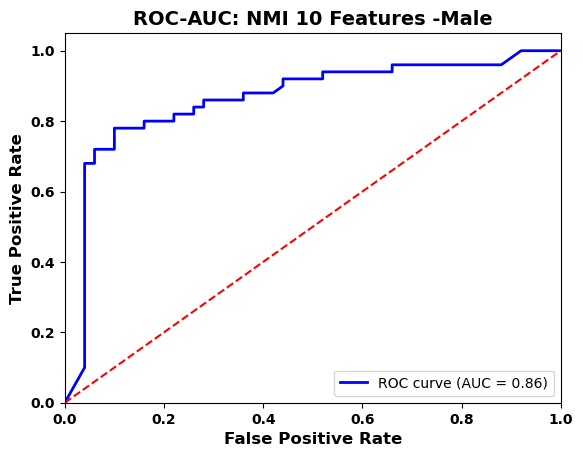

In [13]:
dataset = df1.groupby('APPRDX').apply(lambda x: x.sample(50, random_state=1))
X = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values
classifier = RandomForestClassifier(n_estimators=100, criterion='gini')

# Generate predicted probabilities using cross-validation
y_prob = cross_val_predict(classifier, X, y, cv=10, method='predict_proba')

# Calculate the false positive rate and true positive rate for different thresholds
fpr, tpr, thresholds = roc_curve(y, y_prob[:, 1], pos_label=1)

# Calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='b', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='r', lw=1.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel('False Positive Rate', fontweight='bold',fontsize=12)
plt.ylabel('True Positive Rate', fontweight='bold',fontsize=12)
plt.title('ROC-AUC: NMI 10 Features -Male', fontweight='bold',fontsize=14)
plt.legend(loc="lower right")
# save the plot as SVG and PDF files
plt.savefig('ROC_AUC_NMI10Feat.svg')
plt.savefig('ROC_AUC_NMI10Feat.pdf')
plt.show()


## Random Forest All 10

In [14]:
df1 = pd.read_csv('RanFor_All45Feats_Data_Male.csv')
df1['APPRDX'] = df1['APPRDX'] -1
df1.head(2)

,APPRDX,UPSIT,Symbol_Digit,MDSP_Fatigue,Trail_Making_B,REM_Dream,MDSP_Pain,Geriatric_Depression,SCOPA_Sex,MDSP_SleepDay,MDSP_SleepNight
0,0,2,1,1,0,2,1,1,0,1,2
1,0,0,1,0,1,0,0,0,0,1,0


In [15]:
np.random.seed (1)
dframe1 = pd.DataFrame(columns=['Accuracy', 'Std_Dev'])

for i in range(1, 101):
    print(i)
    df2 = df1.groupby('APPRDX').apply(lambda x: x.sample(50))
    X = df2.drop('APPRDX', axis = 1)
    y = df2['APPRDX']
    random_forest_model = RandomForestClassifier(n_estimators = 100, max_depth = 5, criterion = 'gini')
    scores = cross_val_score(random_forest_model, X, y, cv = 10, n_jobs = -1)
    mean_score = scores.mean()
    print(f'Mean accuracy: {mean_score}')
    new_row = {'Accuracy': mean_score, 'Std_Dev': std(scores)}
    dframe1 = pd.concat([dframe1, pd.DataFrame(new_row, index=[0])], ignore_index=True)


1
Mean accuracy: 0.8299999999999998
2
Mean accuracy: 0.8400000000000001
3
Mean accuracy: 0.82
4
Mean accuracy: 0.85
5
Mean accuracy: 0.8100000000000002
6
Mean accuracy: 0.8500000000000002
7
Mean accuracy: 0.78
8
Mean accuracy: 0.8
9
Mean accuracy: 0.8500000000000002
10
Mean accuracy: 0.8300000000000001
11
Mean accuracy: 0.85
12
Mean accuracy: 0.76
13
Mean accuracy: 0.8300000000000001
14
Mean accuracy: 0.8700000000000001
15
Mean accuracy: 0.8099999999999999
16
Mean accuracy: 0.8
17
Mean accuracy: 0.8400000000000001
18
Mean accuracy: 0.8400000000000001
19
Mean accuracy: 0.8300000000000001
20
Mean accuracy: 0.82
21
Mean accuracy: 0.82
22
Mean accuracy: 0.8099999999999999
23
Mean accuracy: 0.8300000000000001
24
Mean accuracy: 0.82
25
Mean accuracy: 0.8000000000000002
26
Mean accuracy: 0.8
27
Mean accuracy: 0.76
28
Mean accuracy: 0.85
29
Mean accuracy: 0.8
30
Mean accuracy: 0.8400000000000001
31
Mean accuracy: 0.7899999999999999
32
Mean accuracy: 0.8300000000000001
33
Mean accuracy: 0.84000

In [16]:
print(mean(dframe1['Accuracy']))
dframe1.to_csv ("NonMotor_10Feat_inRanFor_from45Feats_100RF10FCV_Male.csv")

0.8284999999999998


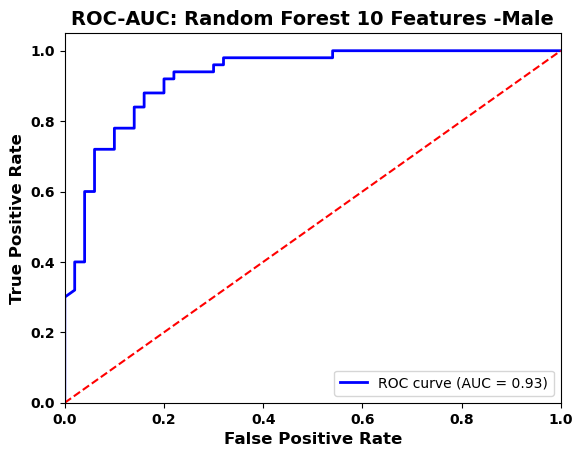

In [17]:
dataset = df1.groupby('APPRDX').apply(lambda x: x.sample(50, random_state=1))
X = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values
classifier = RandomForestClassifier(n_estimators=100, criterion='gini')

# Generate predicted probabilities using cross-validation
y_prob = cross_val_predict(classifier, X, y, cv=10, method='predict_proba')

# Calculate the false positive rate and true positive rate for different thresholds
fpr, tpr, thresholds = roc_curve(y, y_prob[:, 1], pos_label=1)

# Calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='b', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='r', lw=1.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel('False Positive Rate', fontweight='bold',fontsize=12)
plt.ylabel('True Positive Rate', fontweight='bold',fontsize=12)
plt.title('ROC-AUC: Random Forest 10 Features -Male', fontweight='bold',fontsize=14)
plt.legend(loc="lower right")
# save the plot as SVG and PDF files
plt.savefig('ROC_AUC_RF10Feat.svg')
plt.savefig('ROC_AUC_RF10Feat.pdf')
plt.show()


## Boruta All 9

In [18]:
df = pd.read_csv('BorutaR_All45Feats_Data_Male.csv')
print(df.shape)
df.head(3)

(167, 14)


,PATNO,APPRDX,Hopkins_Recog,LetterNumber,MDSP_Fatigue,MDS_Depress,MDS_Apathy,Modif_Boston,Montreal_Cognitive,REM_Dream,Symbol_Digit,Trail_Making_A,Trail_Making_B,UPSIT
0,3010,1,0,1,1,0,1,1,0,2,1,0,0,2
1,3024,1,0,1,0,0,0,1,0,0,1,1,1,0
2,3051,1,0,1,1,0,1,1,0,1,1,0,0,1


In [19]:
df1 = df.drop(['PATNO'], axis=1)
df1['APPRDX'] = df1['APPRDX'] -1
df1.head(2)

,APPRDX,Hopkins_Recog,LetterNumber,MDSP_Fatigue,MDS_Depress,MDS_Apathy,Modif_Boston,Montreal_Cognitive,REM_Dream,Symbol_Digit,Trail_Making_A,Trail_Making_B,UPSIT
0,0,0,1,1,0,1,1,0,2,1,0,0,2
1,0,0,1,0,0,0,1,0,0,1,1,1,0


In [20]:
np.random.seed (1)
dframe1 = pd.DataFrame(columns=['Accuracy', 'Std_Dev'])

for i in range(1, 101):
    print(i)
    df2 = df1.groupby('APPRDX').apply(lambda x: x.sample(50))
    X = df2.drop('APPRDX', axis = 1)
    y = df2['APPRDX']
    random_forest_model = RandomForestClassifier(n_estimators = 100, max_depth = 5, criterion = 'gini')
    scores = cross_val_score(random_forest_model, X, y, cv = 10, n_jobs = -1)
    mean_score = scores.mean()
    print(f'Mean accuracy: {mean_score}')
    new_row = {'Accuracy': mean_score, 'Std_Dev': std(scores)}
    dframe1 = pd.concat([dframe1, pd.DataFrame(new_row, index=[0])], ignore_index=True)


1
Mean accuracy: 0.8600000000000001
2
Mean accuracy: 0.8300000000000001
3
Mean accuracy: 0.85
4
Mean accuracy: 0.89
5
Mean accuracy: 0.8300000000000001
6
Mean accuracy: 0.8400000000000001
7
Mean accuracy: 0.85
8
Mean accuracy: 0.8400000000000001
9
Mean accuracy: 0.8800000000000001
10
Mean accuracy: 0.8400000000000001
11
Mean accuracy: 0.8899999999999999
12
Mean accuracy: 0.8300000000000001
13
Mean accuracy: 0.8200000000000001
14
Mean accuracy: 0.9
15
Mean accuracy: 0.8300000000000001
16
Mean accuracy: 0.8800000000000001
17
Mean accuracy: 0.8699999999999999
18
Mean accuracy: 0.85
19
Mean accuracy: 0.85
20
Mean accuracy: 0.8700000000000001
21
Mean accuracy: 0.8099999999999999
22
Mean accuracy: 0.8300000000000001
23
Mean accuracy: 0.8200000000000001
24
Mean accuracy: 0.8399999999999999
25
Mean accuracy: 0.8800000000000001
26
Mean accuracy: 0.8600000000000001
27
Mean accuracy: 0.8400000000000001
28
Mean accuracy: 0.8300000000000001
29
Mean accuracy: 0.8699999999999999
30
Mean accuracy: 0.8

In [21]:
print(mean(dframe1['Accuracy']))
dframe1.to_csv ("NonMotor_9Feat_inBoruta_from45Feats_100RF10FCV_Male.csv")

0.8528000000000004


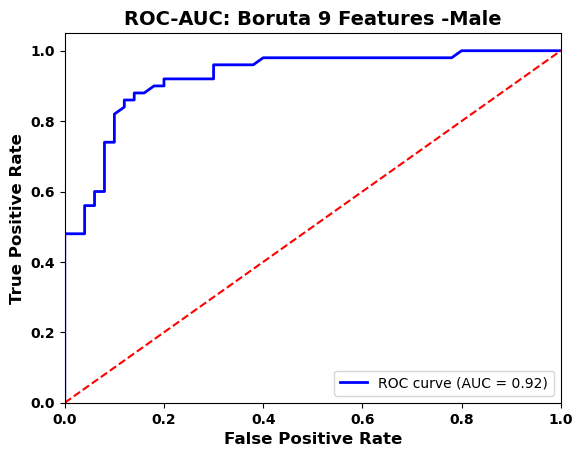

In [22]:
dataset = df1.groupby('APPRDX').apply(lambda x: x.sample(50, random_state=1))
X = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values
classifier = RandomForestClassifier(n_estimators=100, criterion='gini')

# Generate predicted probabilities using cross-validation
y_prob = cross_val_predict(classifier, X, y, cv=10, method='predict_proba')

# Calculate the false positive rate and true positive rate for different thresholds
fpr, tpr, thresholds = roc_curve(y, y_prob[:, 1], pos_label=1)

# Calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='b', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='r', lw=1.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel('False Positive Rate', fontweight='bold',fontsize=12)
plt.ylabel('True Positive Rate', fontweight='bold',fontsize=12)
plt.title('ROC-AUC: Boruta 9 Features -Male', fontweight='bold',fontsize=14)
plt.legend(loc="lower right")
# save the plot as SVG and PDF files
plt.savefig('ROC_AUC_Boruta9Feat.svg')
plt.savefig('ROC_AUC_Boruta9Feat.pdf')
plt.show()


## Decision Tree All 10

In [23]:
df1 = pd.read_csv('DecTree_All45Feats_Data_Male.csv')
df1['APPRDX'] = df1['APPRDX'] -1
df1.head(2)

,APPRDX,UPSIT,Symbol_Digit,Trail_Making_B,MDSP_Fatigue,MDS_Apathy
0,0,2,1,0,1,1
1,0,0,1,1,0,0


In [24]:
np.random.seed (1)
dframe1 = pd.DataFrame(columns=['Accuracy', 'Std_Dev'])

for i in range(1, 101):
    print(i)
    df2 = df1.groupby('APPRDX').apply(lambda x: x.sample(50))
    X = df2.drop('APPRDX', axis = 1)
    y = df2['APPRDX']
    random_forest_model = RandomForestClassifier(n_estimators = 100, max_depth = 5, criterion = 'gini')
    scores = cross_val_score(random_forest_model, X, y, cv = 10, n_jobs = -1)
    mean_score = scores.mean()
    print(f'Mean accuracy: {mean_score}')
    new_row = {'Accuracy': mean_score, 'Std_Dev': std(scores)}
    dframe1 = pd.concat([dframe1, pd.DataFrame(new_row, index=[0])], ignore_index=True)


1
Mean accuracy: 0.76
2
Mean accuracy: 0.8200000000000001
3
Mean accuracy: 0.8300000000000001
4
Mean accuracy: 0.8099999999999999
5
Mean accuracy: 0.8300000000000001
6
Mean accuracy: 0.78
7
Mean accuracy: 0.79
8
Mean accuracy: 0.8100000000000002
9
Mean accuracy: 0.86
10
Mean accuracy: 0.8300000000000001
11
Mean accuracy: 0.85
12
Mean accuracy: 0.75
13
Mean accuracy: 0.8
14
Mean accuracy: 0.8800000000000001
15
Mean accuracy: 0.75
16
Mean accuracy: 0.8300000000000001
17
Mean accuracy: 0.86
18
Mean accuracy: 0.77
19
Mean accuracy: 0.8099999999999999
20
Mean accuracy: 0.82
21
Mean accuracy: 0.7899999999999999
22
Mean accuracy: 0.8099999999999999
23
Mean accuracy: 0.7900000000000001
24
Mean accuracy: 0.8099999999999999
25
Mean accuracy: 0.8099999999999999
26
Mean accuracy: 0.8
27
Mean accuracy: 0.8400000000000001
28
Mean accuracy: 0.75
29
Mean accuracy: 0.8300000000000001
30
Mean accuracy: 0.75
31
Mean accuracy: 0.8099999999999999
32
Mean accuracy: 0.8099999999999999
33
Mean accuracy: 0.78


In [25]:
print(mean(dframe1['Accuracy']))
dframe1.to_csv ("NonMotor_10Feat_inDecTree_from45Feats_100RF10FCV_Male.csv", index=False)

0.8088999999999998


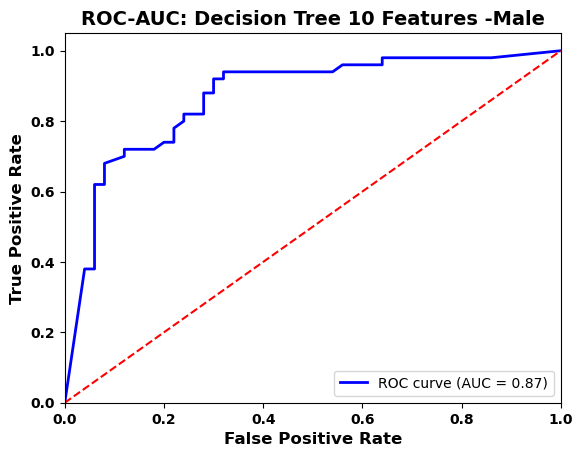

In [26]:
dataset = df1.groupby('APPRDX').apply(lambda x: x.sample(50, random_state=1))
X = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values
classifier = RandomForestClassifier(n_estimators=100, criterion='gini')

# Generate predicted probabilities using cross-validation
y_prob = cross_val_predict(classifier, X, y, cv=10, method='predict_proba')

# Calculate the false positive rate and true positive rate for different thresholds
fpr, tpr, thresholds = roc_curve(y, y_prob[:, 1], pos_label=1)

# Calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='b', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='r', lw=1.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel('False Positive Rate', fontweight='bold',fontsize=12)
plt.ylabel('True Positive Rate', fontweight='bold',fontsize=12)
plt.title('ROC-AUC: Decision Tree 10 Features -Male', fontweight='bold',fontsize=14)
plt.legend(loc="lower right")
# save the plot as SVG and PDF files
plt.savefig('ROC_AUC_DecTree10Feat.svg')
plt.savefig('ROC_AUC_DecTree10Feat.pdf')
plt.show()


## Common CpG in at least two. Sample = 11

In [27]:
df = pd.read_csv('Any2Common_inAll45Feats_Data_Male.csv')
print(df.shape)
df.head(3)

(167, 13)


,PATNO,APPRDX,MDS_Apathy,MDS_Depress,MDSP_Fatigue,MDSP_SleepDay,Montreal_Cognitive,REM_Dream,SCOPA_Sex,Symbol_Digit,Trail_Making_A,Trail_Making_B,UPSIT
0,3010,1,1,0,1,1,0,2,0,1,0,0,2
1,3024,1,0,0,0,1,0,0,0,1,1,1,0
2,3051,1,1,0,1,1,0,1,1,1,0,0,1


In [28]:
df1 = df.drop(['PATNO'], axis=1)
df1['APPRDX'] = df1['APPRDX'] -1
df1.head(2)

,APPRDX,MDS_Apathy,MDS_Depress,MDSP_Fatigue,MDSP_SleepDay,Montreal_Cognitive,REM_Dream,SCOPA_Sex,Symbol_Digit,Trail_Making_A,Trail_Making_B,UPSIT
0,0,1,0,1,1,0,2,0,1,0,0,2
1,0,0,0,0,1,0,0,0,1,1,1,0


In [29]:
np.random.seed (1)
dframe1 = pd.DataFrame(columns=['Accuracy', 'Std_Dev'])

for i in range(1, 101):
    print(i)
    df2 = df1.groupby('APPRDX').apply(lambda x: x.sample(50))
    X = df2.drop('APPRDX', axis = 1)
    y = df2['APPRDX']
    random_forest_model = RandomForestClassifier(n_estimators = 100, max_depth = 5, criterion = 'gini')
    scores = cross_val_score(random_forest_model, X, y, cv = 10, n_jobs = -1)
    mean_score = scores.mean()
    print(f'Mean accuracy: {mean_score}')
    new_row = {'Accuracy': mean_score, 'Std_Dev': std(scores)}
    dframe1 = pd.concat([dframe1, pd.DataFrame(new_row, index=[0])], ignore_index=True)


1
Mean accuracy: 0.8400000000000001
2
Mean accuracy: 0.8200000000000001
3
Mean accuracy: 0.85
4
Mean accuracy: 0.85
5
Mean accuracy: 0.8400000000000001
6
Mean accuracy: 0.8800000000000001
7
Mean accuracy: 0.85
8
Mean accuracy: 0.8099999999999999
9
Mean accuracy: 0.8699999999999999
10
Mean accuracy: 0.8099999999999999
11
Mean accuracy: 0.8699999999999999
12
Mean accuracy: 0.7899999999999999
13
Mean accuracy: 0.86
14
Mean accuracy: 0.8800000000000001
15
Mean accuracy: 0.8300000000000001
16
Mean accuracy: 0.85
17
Mean accuracy: 0.8699999999999999
18
Mean accuracy: 0.85
19
Mean accuracy: 0.8400000000000001
20
Mean accuracy: 0.8799999999999999
21
Mean accuracy: 0.8099999999999999
22
Mean accuracy: 0.8400000000000001
23
Mean accuracy: 0.85
24
Mean accuracy: 0.85
25
Mean accuracy: 0.8500000000000002
26
Mean accuracy: 0.85
27
Mean accuracy: 0.8099999999999999
28
Mean accuracy: 0.8
29
Mean accuracy: 0.8699999999999999
30
Mean accuracy: 0.8100000000000002
31
Mean accuracy: 0.85
32
Mean accuracy:

In [30]:
print(mean(dframe1['Accuracy']))
dframe1.to_csv ("NonMotor_8Feat_inAny2Common_from45Feats_100RF10FCV_Male.csv", index=False)

0.8490000000000001


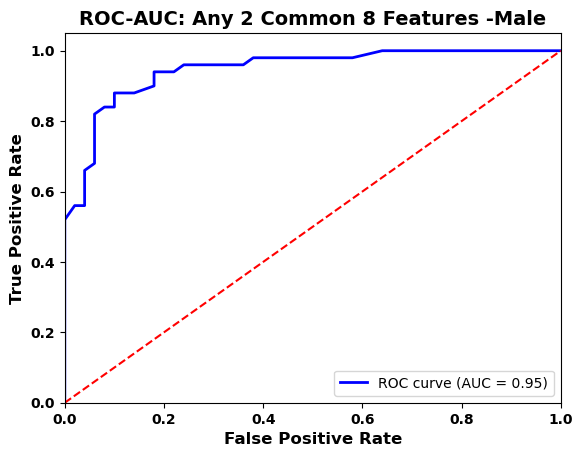

In [31]:
dataset = df1.groupby('APPRDX').apply(lambda x: x.sample(50, random_state=1))
X = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values
classifier = RandomForestClassifier(n_estimators=100, criterion='gini')

# Generate predicted probabilities using cross-validation
y_prob = cross_val_predict(classifier, X, y, cv=10, method='predict_proba')

# Calculate the false positive rate and true positive rate for different thresholds
fpr, tpr, thresholds = roc_curve(y, y_prob[:, 1], pos_label=1)

# Calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='b', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='r', lw=1.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel('False Positive Rate', fontweight='bold',fontsize=12)
plt.ylabel('True Positive Rate', fontweight='bold',fontsize=12)
plt.title('ROC-AUC: Any 2 Common 8 Features -Male', fontweight='bold',fontsize=14)
plt.legend(loc="lower right")
# save the plot as SVG and PDF files
plt.savefig('ROC_AUC_Common8Feat.svg')
plt.savefig('ROC_AUC_Common8Feat.pdf')
plt.show()


## Common CpG in all four methods. Sample = 17

In [32]:
df1 = pd.read_csv('AllCommon_inAll45Feats_Data_Male.csv')
df1['APPRDX'] = df1['APPRDX'] -1
df1.head(2)

,APPRDX,Geriatric_Depression,Hopkins_Recog,LetterNumber,MDS_Apathy,MDS_Depress,MDSP_Fatigue,MDSP_LightHead,MDSP_Pain,MDSP_SleepDay,MDSP_SleepNight,Modif_Boston,Montreal_Cognitive,REM_Dream,SCOPA_Sex,Symbol_Digit,Trail_Making_A,Trail_Making_B,UPSIT
0,0,1,0,1,1,0,1,1,1,1,2,1,0,2,0,1,0,0,2
1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,1,1,0


In [33]:
np.random.seed (1)
dframe1 = pd.DataFrame(columns=['Accuracy', 'Std_Dev'])

for i in range(1, 101):
    print(i)
    df2 = df1.groupby('APPRDX').apply(lambda x: x.sample(50))
    X = df2.drop('APPRDX', axis = 1)
    y = df2['APPRDX']
    random_forest_model = RandomForestClassifier(n_estimators = 100, max_depth = 5, criterion = 'gini')
    scores = cross_val_score(random_forest_model, X, y, cv = 10, n_jobs = -1)
    mean_score = scores.mean()
    print(f'Mean accuracy: {mean_score}')
    new_row = {'Accuracy': mean_score, 'Std_Dev': std(scores)}
    dframe1 = pd.concat([dframe1, pd.DataFrame(new_row, index=[0])], ignore_index=True)


1
Mean accuracy: 0.8600000000000001
2
Mean accuracy: 0.8600000000000001
3
Mean accuracy: 0.8699999999999999
4
Mean accuracy: 0.8400000000000001
5
Mean accuracy: 0.7999999999999999
6
Mean accuracy: 0.8700000000000001
7
Mean accuracy: 0.8
8
Mean accuracy: 0.82
9
Mean accuracy: 0.8800000000000001
10
Mean accuracy: 0.77
11
Mean accuracy: 0.8899999999999999
12
Mean accuracy: 0.8100000000000002
13
Mean accuracy: 0.8300000000000001
14
Mean accuracy: 0.9099999999999999
15
Mean accuracy: 0.85
16
Mean accuracy: 0.8300000000000001
17
Mean accuracy: 0.8699999999999999
18
Mean accuracy: 0.8200000000000001
19
Mean accuracy: 0.8099999999999999
20
Mean accuracy: 0.86
21
Mean accuracy: 0.8300000000000001
22
Mean accuracy: 0.82
23
Mean accuracy: 0.82
24
Mean accuracy: 0.85
25
Mean accuracy: 0.8700000000000001
26
Mean accuracy: 0.82
27
Mean accuracy: 0.82
28
Mean accuracy: 0.8300000000000001
29
Mean accuracy: 0.8699999999999999
30
Mean accuracy: 0.8200000000000001
31
Mean accuracy: 0.8700000000000001
32


In [34]:
print(mean(dframe1['Accuracy']))
dframe1.to_csv ("NonMotor_17Feat_inAllCommon_from45Feats_100RF10FCV_Male.csv", index=False)

0.8453000000000002


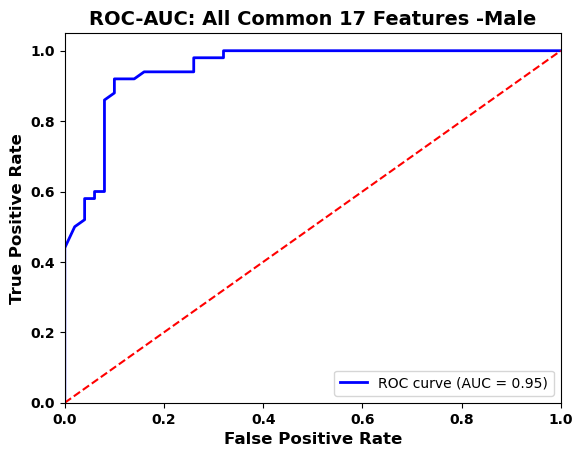

In [35]:
dataset = df1.groupby('APPRDX').apply(lambda x: x.sample(50, random_state=1))
X = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values
classifier = RandomForestClassifier(n_estimators=100, criterion='gini')

# Generate predicted probabilities using cross-validation
y_prob = cross_val_predict(classifier, X, y, cv=10, method='predict_proba')

# Calculate the false positive rate and true positive rate for different thresholds
fpr, tpr, thresholds = roc_curve(y, y_prob[:, 1], pos_label=1)

# Calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='b', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='r', lw=1.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel('False Positive Rate', fontweight='bold',fontsize=12)
plt.ylabel('True Positive Rate', fontweight='bold',fontsize=12)
plt.title('ROC-AUC: All Common 17 Features -Male', fontweight='bold',fontsize=14)
plt.legend(loc="lower right")
# save the plot as SVG and PDF files
plt.savefig('ROC_AUC_allCommon17Feat.svg')
plt.savefig('ROC_AUC_allCommon17Feat.pdf')
plt.show()
